<a href="https://colab.research.google.com/github/alka62/decision-tree-random-forest-heart-disease/blob/main/Decision_tree_random_forest_heart_disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Please upload heart.csv file...


Saving archive (6).zip to archive (6) (1).zip
Extracted archive (6) (1).zip
Shape of dataset: (1025, 14)
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  

Decision Tree Accuracy: 0.9853658536585366
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg  

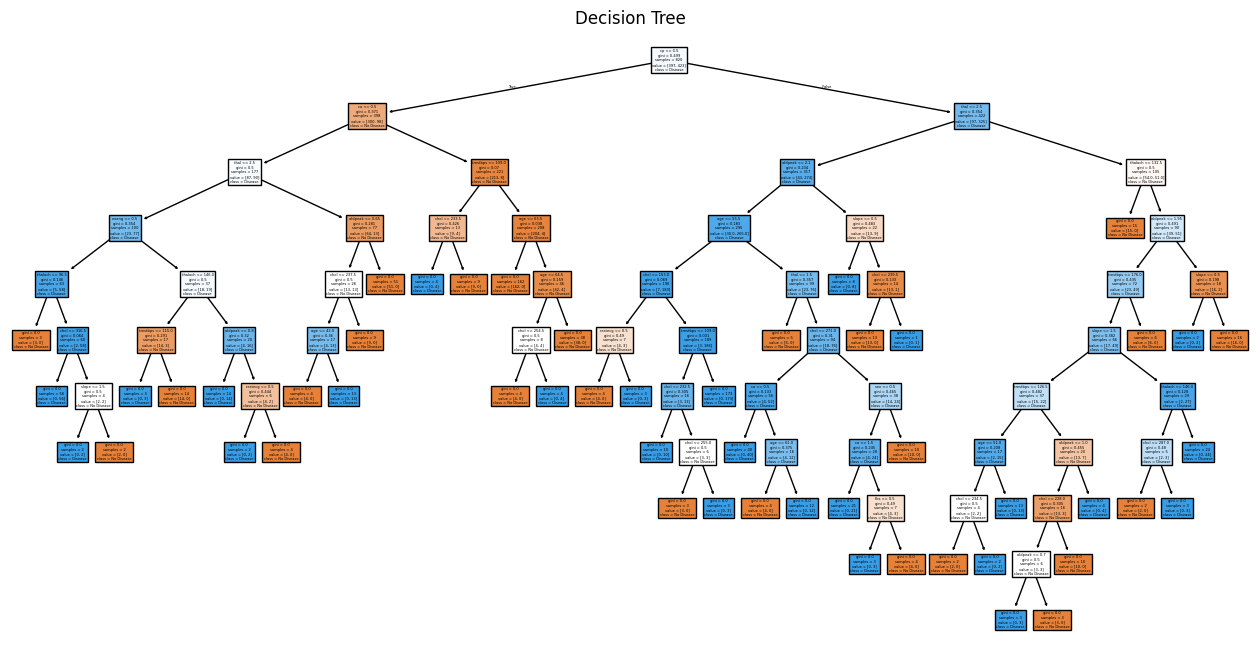


Pruned Decision Tree Accuracy: 0.8

Random Forest Accuracy: 0.9853658536585366
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



/tmp/ipython-input-1492626597.py:84: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances[indices], y=X.columns[indices], palette="viridis")


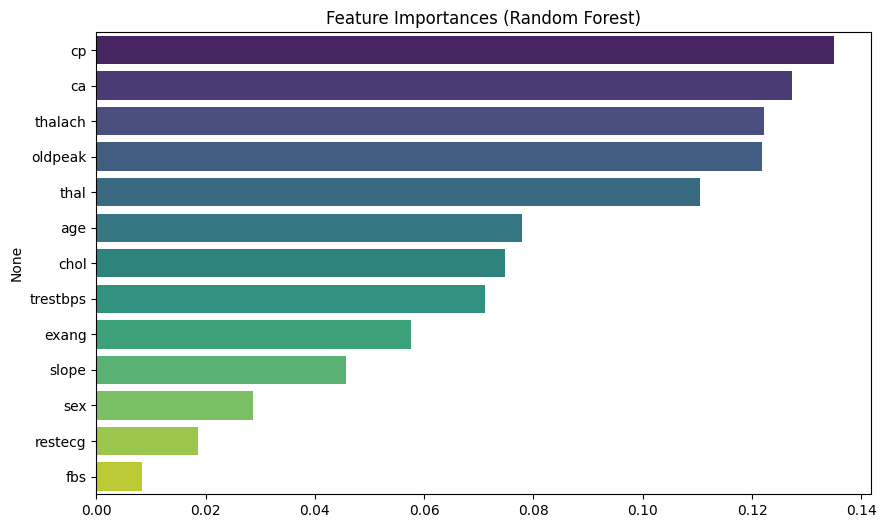


Cross-validation Accuracy (Decision Tree): 0.8341463414634147
Cross-validation Accuracy (Random Forest): 0.9970731707317073


In [4]:
# Task 5: Decision Trees and Random Forests on Heart Disease Dataset

# 1. Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile
import os

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import export_graphviz
import graphviz

from google.colab import files  # For file upload in Colab

# 2. Upload dataset
print("Please upload heart.csv file...")
uploaded = files.upload()

# Assuming the uploaded file is a zip archive containing heart.csv
for filename in uploaded.keys():
    zip_filename = filename
    break

if zip_filename.endswith('.zip'):
    with zipfile.ZipFile(zip_filename, 'r') as zip_ref:
        zip_ref.extractall()
    print(f"Extracted {zip_filename}")
else:
    print("Uploaded file is not a zip archive.")


df = pd.read_csv("heart.csv")

# 3. Basic exploration
print("Shape of dataset:", df.shape)
print(df.head())

# 4. Features and Target
X = df.drop("target", axis=1)
y = df["target"]

# 5. Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
    )

# 6. Decision Tree Classifier (without depth limit)
dt_clf = DecisionTreeClassifier(random_state=42)
dt_clf.fit(X_train, y_train)

y_pred_dt = dt_clf.predict(X_test)
print("\nDecision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))

# Visualize the tree
plt.figure(figsize=(16, 8))
plot_tree(dt_clf, feature_names=X.columns, class_names=["No Disease", "Disease"], filled=True)
plt.title("Decision Tree")
plt.show()

# 7. Overfitting analysis - Control max_depth
dt_clf_pruned = DecisionTreeClassifier(max_depth=4, random_state=42)
dt_clf_pruned.fit(X_train, y_train)
y_pred_pruned = dt_clf_pruned.predict(X_test)
print("\nPruned Decision Tree Accuracy:", accuracy_score(y_test, y_pred_pruned))

# 8. Random Forest Classifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)
y_pred_rf = rf_clf.predict(X_test)
print("\nRandom Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

# 9. Feature Importance
importances = rf_clf.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
sns.barplot(x=importances[indices], y=X.columns[indices], palette="viridis", hue=X.columns[indices], legend=False)
plt.title("Feature Importances (Random Forest)")
plt.show()

# 10. Cross-validation scores
cv_scores_dt = cross_val_score(dt_clf_pruned, X, y, cv=5)
cv_scores_rf = cross_val_score(rf_clf, X, y, cv=5)

print("\nCross-validation Accuracy (Decision Tree):", np.mean(cv_scores_dt))
print("Cross-validation Accuracy (Random Forest):", np.mean(cv_scores_rf))